# <span style="color:red"> EDA, FE and Linear Regression Models (Algerian Forest Fires Dataset)</span>

# <span style="color:green"> 1. EDA and FE </span>

1. Data Profiling : Data profiling refers to the process of examining, analyzing, reviewing ,summarizing datasets to gain insight into the quality of data.
Investigating data quality issues, such as duplication, lack of consistency,lack of accuracy and completeness.

2.Stastical analysis: Statistical analysis is the collection and interpretation of data in order to uncover patterns and trends. It is a component of data analytics. Statistical analysis can be used in situations like gathering research interpretations, statistical modeling or designing surveys and studies.

3. Graphical Analysis:The graphical analysis creates pictures of the data, and this will helps to understand the patterns and also the correlation between process parameters. Often graphical analysis is the starting point for any problem-solving method.

4.Data Cleaning:Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled.

5.Data Encoding:Data encoding is the conversion of data into digital signals i.e. zeros and ones. 

6.Data Scaling: This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN).

# <span style="color:green"> 2. Regression Models </span>

1.Linear Regression: Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. It is a statistical method that is used for predictive analysis.

2.Ridge Regression:Ridge regression is a regularization technique, which is used to reduce the complexity of the model. It is also called as L2 regularization. In this technique, the cost function is altered by adding the penalty term to it. The amount of bias added to the model is called Ridge Regression penalty.

3.Lasso Regression:Lasso regression is also called Penalized regression method. This method is usually used in machine learning for the selection of the subset of variables. It provides greater prediction accuracy as compared to other regression models. Lasso Regularization helps to increase model interpretation.

Lasso regression is a L1 regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

4.Elastic-Net Regression:Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.

5.Performance metrics for above models

Dataset: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

# <span style="color:green"> Problem Statement: </span>

1. To predict temperature of region where fire is occuring using Algerian Forrest Fire dataset

# <span style ="color:green"> Importing all the required libraries </span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

pd.set_option("display.max_columns" ,500)


# <span style="color:green"> 1.0 Importing dataset and cleaning data </span>

In [2]:
data = pd.read_csv("desktop/Datasets/Algerian_forest_fires_dataset.csv",header = 0)
data.iloc[120:].head(6)# index 122, 123,124 need to be removed from dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


# <span style="color : green">1.1 Dropping rows which have no information </span>

In [3]:
data.drop(index=[122,123,124],inplace=True)
data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)
data.iloc[120:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


# <span style="color:green"> 1.2 Creating Region feature </span>

In [4]:
### creating feature called Region 0 for Bejaia region and 1 for Sidi Bel-abbes region

data.loc[:122 ,"Region"]=0
data.loc[122: ,"Region"]=1

data.iloc[120:].head(8)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
125,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0
126,5,6,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1.0
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1.0


# <span style="color:green"> 1.3 Datatypes and describe </span>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [6]:
data.describe(include="all")

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244.000000
unique,31,4,1,19,62,18,39,173,166,198,106,174,126,8,NaN
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,NaN
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.501028
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [7]:
data.describe()

,Region
count,244.000000
mean,0.500000
std,0.501028
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


# <span style="color:green"> 1.4 Data Cleaning </span>

In [8]:
# here it is visible that some columns have spaces in the names like RH, Ws
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [9]:
data.columns=[col_name.strip() for col_name in data.columns]
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [10]:
### somes values in colums also have space
for feature in ['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    data[feature]= data[feature].str.replace(" ","")
    

In [11]:
data.iloc[163:166]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
163,12,7,2012,36,44,13,0,90.1,12.6,19.4,8.3,12.5,9.6,fire,1.0
164,13,7,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire,1.0
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,fire,NaN,1.0


In [12]:
### index no 165 for feature name FWI has value fire
data[data["FWI"] == "fire"].index

Int64Index([165], dtype='int64')

In [13]:
data.loc[165,"FWI"]= 0.1

In [14]:
data.iloc[162:166]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
162,11,7,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,notfire,1.0
163,12,7,2012,36,44,13,0,90.1,12.6,19.4,8.3,12.5,9.6,fire,1.0
164,13,7,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire,1.0
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,0.1,NaN,1.0


In [15]:
### replacing nan value with fire to make data equal to the info given in dataset 

data[data["Classes"]== "NAN"].index

Int64Index([], dtype='int64')

In [16]:
data.loc[165,"Classes"]= "fire"

In [17]:
### encoding classes feature

data["Classes"]= data["Classes"].str.replace("notfire","0")
data["Classes"]= data["Classes"].str.replace("fire","1")

In [18]:
data.iloc[165:167]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,0.1,1,1.0
166,15,7,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,1,1.0


In [19]:
data.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

# <span style="color:green"> 1.5 Changing datatypes </span>

In [20]:
### changing datatypes of features to numerical for numerical features as all are in object

data_type_convert= {'day':'int64', 'month':'int64', 'year':'int64', 'Temperature':'int64', 'RH':'int64', 'Ws':'int64', 'Rain':'float64', 'FFMC':'float64',
       'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64', 'Classes':'int64', 'Region':'float64'}
data=data.astype(data_type_convert)
data.dtypes


day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region         float64
dtype: object

In [21]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [22]:
 data.shape

(244, 15)

# <span style = "color:green"> 1.6 Info about dataset and its attributes</span>

In [23]:
data[data["Classes"]== 0].count().values

array([106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106,
       106, 106], dtype=int64)

In [24]:
data[data["Classes"]== 1].count().values

array([138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138, 138,
       138, 138], dtype=int64)

In [25]:
data["Temperature"].max()

42

In [26]:
data["Temperature"].min()

22

In [27]:
data["RH"].max()

90

In [28]:
data["RH"].min()

21

In [29]:
data['Ws'].min()

6

In [30]:
data['Ws'].max()

29

In [31]:
data['Rain'].min()

0.0

In [32]:
data['Rain'].max()

16.8

In [33]:
data['FFMC'].min()

28.6

In [34]:
data['FFMC'].max()

96.0

In [35]:
data['DMC'].min()

0.7

In [36]:
data['DMC'].max()

65.9

In [37]:
data['DC'].min()

6.9

In [38]:
data['DC'].max()

220.4

In [39]:
data['ISI'].min()

0.0

In [40]:
data['ISI'].max()

19.0

In [41]:
data['BUI'].min()

1.1

In [42]:
data['BUI'].max()

68.0

In [43]:
data['FWI'].min()

0.0

In [44]:
data['FWI'].max()

31.1

# <span style="color:Red"> 1.6 Info about dataset and its attributes:</span>
    
1.The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

2.122 instances for each region.

3.The period from June 2012 to September 2012.

4.The dataset includes 11 attribues and 1 output attribue (class)

5.The 244 instances have been classified into fire (138 classes) and notfire (106 classes) classes.

#<span style="color:Red">Attributes</span>
Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

#<span style="color:Red">Weather data observations</span>

1.Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

2.RH : Relative Humidity in %: 21 to 90

3.Ws :Wind speed in km/h: 6 to 29

4.Rain: total day in mm: 0 to 16.8

#<span style="color:Red">FWI Components </span>

1.Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

2.Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

3.Drought Code (DC) index from the FWI system: 7 to 220.4

4.Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

5.Buildup Index (BUI) index from the FWI system: 1.1 to 68

6.Fire Weather Index (FWI) Index: 0 to 31.1

7.Classes: two classes, namely fire encoded as 1 and not fire encoded as 0

# <span style="color:green"> 1.7 Checking Null values </span>

In [45]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

# <span style="color:green"> Observation: </span>
    
There is no null value in dataset.
Total 244 rowws and 15 columns is present.

# <span style=" color:green"> 2.0 Numerical and continuous features </span>
<span style=" color:green">2.1 Categorical Features </span>

In [46]:
# categorical features
categorical_features= [feature for feature in data.columns if data[feature].dtypes =="O"]

#getting to know different categories in cateogrical features with its count.
for feature in categorical_features:
    print(data.groupby(feature)["Region"].value_counts())

<AxesSubplot:xlabel='Classes', ylabel='count'>

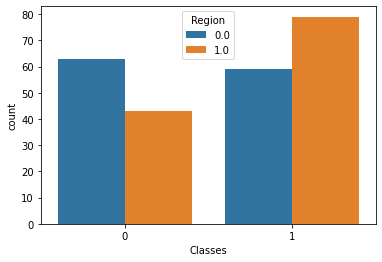

In [47]:
sns.countplot(data=data , x="Classes", hue="Region")

# <span style="color:red"> Observation:</span> 
    
It is evident that Sidi Bel-abbes region has more occurance of fire than Bejaia region.

# <span style="color:green" > 2.2 Numerical features </span>
































































In [48]:
### Getting list of numerical features
Numerical_features= [feature for feature in data.columns if data[feature].dtypes != "O"]
print(Numerical_features)

['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']


In [49]:
### Getting uniques values in each numerical features
data[Numerical_features].nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
Region           2
dtype: int64

# <span style="color:green"> 2.3 Seggregating discrete and continuous variables </span>


# <span style="color:green"> 2.3.1 Discrete Numerical Features </span>

In [50]:
#here the assumption to consider a feature discrete is that it should have less than 35 unique values otherwise it will be 
# considered continuous featur

Discrete_Numericals= [feature for feature in Numerical_features if (len(data[feature].unique())<= 35)]
Discrete_Numericals

['day', 'month', 'year', 'Temperature', 'Ws', 'Classes', 'Region']

# <span style="color:green"> 2.3.1.1 Discrete Numerical Feature vs Target Feature </span>

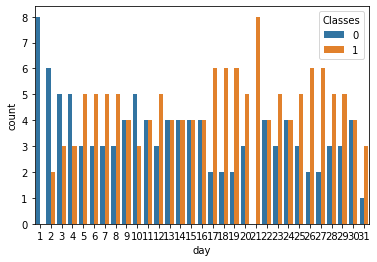

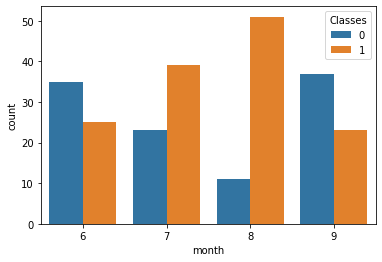

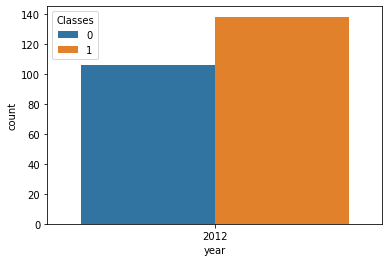

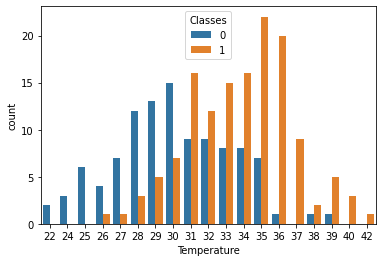

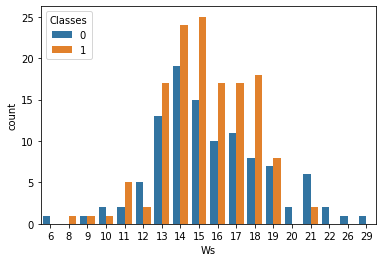

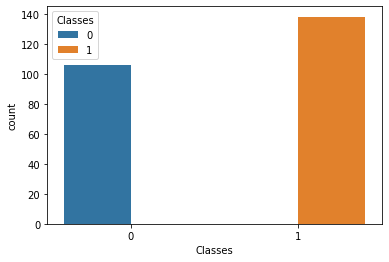

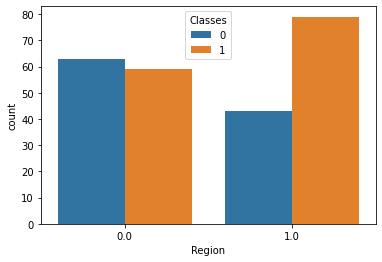

In [51]:
### this is bivariate analysis between target feature classes and discrete numerical features
### for this we plot count plot

for feature in Discrete_Numericals:
    sns.countplot(data=data, x= feature, hue="Classes")
    plt.show()

# <span style="color:red"> Observations </span>

1.From day vs Classes plot it is visible that on almost all days the occurance of fire is there, and its count is more than or equal to the count of no fire cases.

2.From month vs Classes plot it is visible that july and august month have more cases of occurance of fire as compared to other two months of june and september where occurance of fire is less as compared to no fire.

3.The month of august has highest no of cases of occurance of fire.

4.Overall cases of occurance of fire is more than the cases of no occurance of fire.

5.From temperature vs Classes plot it is visible that temperature between 30 to 37 degree celcius have most no of cases of occurance of fire.

6.From windspeed vs Classes plot it is visible that for wind speed between 13 to 19 Km/hr range there is most no of occurance of fire.

7.From Region vs Class plot it is visible that in Bejaia region, the no of cases of occurance of fire is less compared to no fire.

8.In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire. Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.

# <span style="color:green"> 2.3.2 Continuous Numerical Features </span>

In [52]:
continuous_Numerical_feature=[feature for feature in Numerical_features if feature not in Discrete_Numericals]
continuous_Numerical_feature

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# <span style="color:green"> 2.3.2.1 Distribution of Continuous Numerical Features </span>

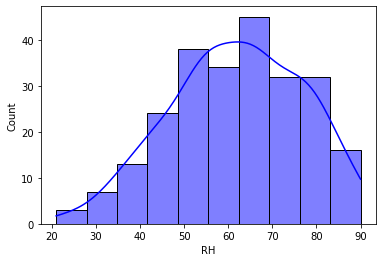

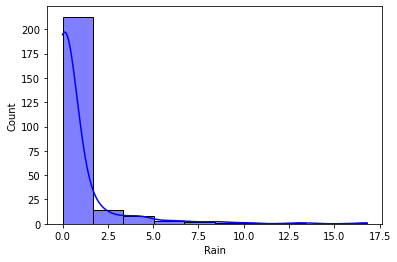

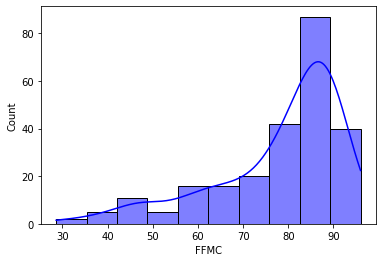

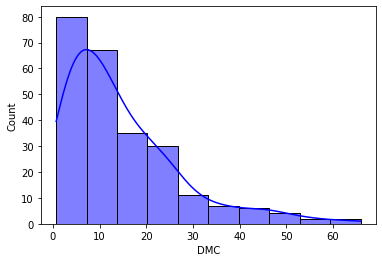

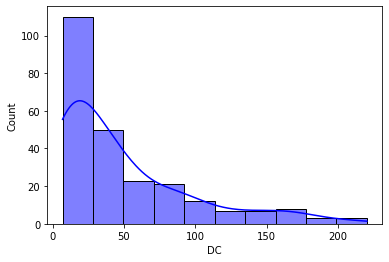

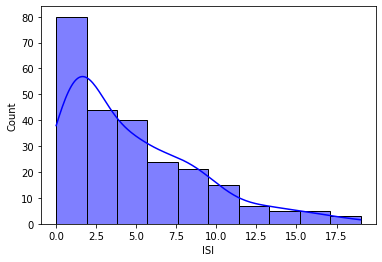

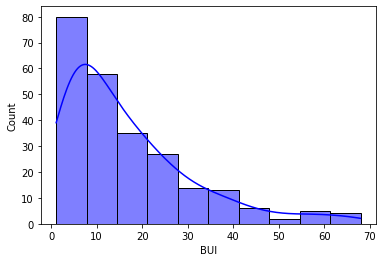

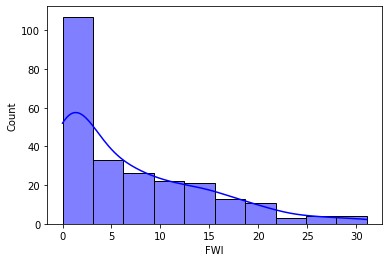

In [53]:
### Checking distribution of Continuous numerical features
for feature in continuous_Numerical_feature:
    sns.histplot(data=data, x= feature,kde = True ,bins =10,color="blue")
    plt.title
    plt.show()

# <span style="color:red"> Observations</span>

1.Relative humidity is following gaussian distribution.

2.Rain, DMC, DC, ISI, BUI, FWI are following right skewed distribution(Log-Normal distribution).

3.FFMC feature follows left skwed distribution.

# <span style="color:green"> 2.4 Checking for outliers </span>

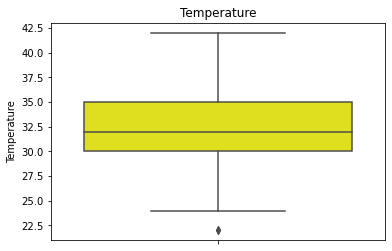

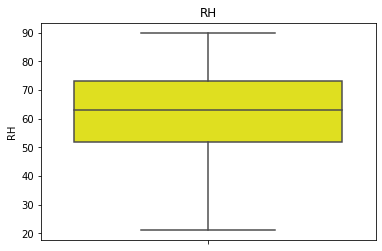

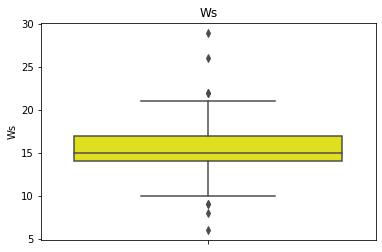

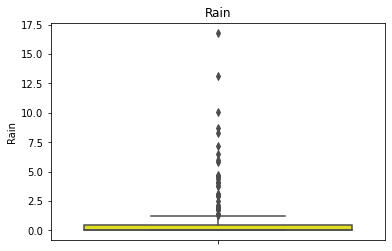

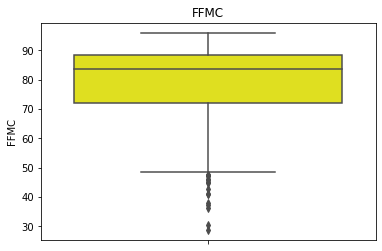

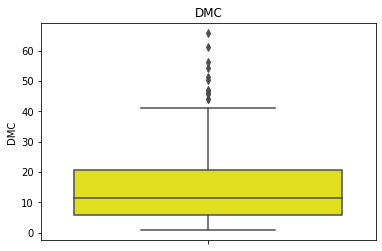

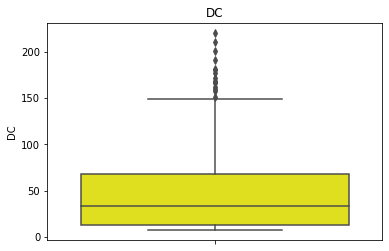

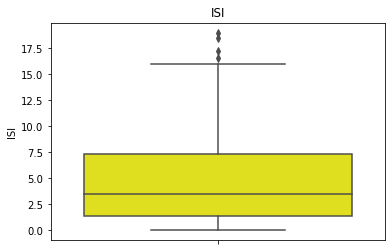

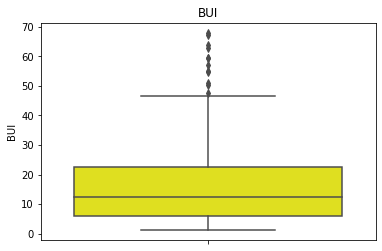

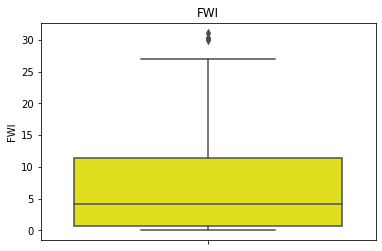

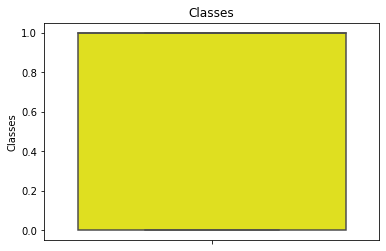

In [54]:
### excluding 'day', 'month','year', 'Region'.
for feature in [feature for feature in Numerical_features if feature not in ["day","month","year","Region"]]:
    sns.boxplot(data=data,y=feature,color="yellow")
    plt.title(feature)
    plt.show();

# <span style="color: red"> Observations </span>

1.Relative Humidity, RH feature doesnt have outliers.

2.Temperature and FFMC have outliers in lower boundary side.

3.Wind Speed, Ws has outliers on both sides(Upper and lower boundary).

4.Rain, DMC,DC, ISI, BUI and FWI have outilers in upper boundary side.

# <span style="color:green"> 3.0 Correlation between each Numerical features </span>

In [55]:
dataset = round(data[[feature for feature in Numerical_features if feature not in ["day","month","year","Region"]]].corr(),2)
dataset

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.37,0.61,0.46,0.56,0.52
RH,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.22,-0.69,-0.35,-0.57,-0.44
Ws,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.08,0.02,0.03,0.03,-0.07
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32,-0.38
FFMC,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.50,0.74,0.59,0.69,0.77
DMC,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.67,0.98,0.87,0.58
DC,0.37,-0.22,0.08,-0.30,0.50,0.88,1.00,0.50,0.94,0.74,0.51
ISI,0.61,-0.69,0.02,-0.35,0.74,0.67,0.50,1.00,0.64,0.91,0.74
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86,0.58
FWI,0.56,-0.57,0.03,-0.32,0.69,0.87,0.74,0.91,0.86,1.00,0.71


# <span style="color:green"> 3.1 Heatmap to visualise the Correlation </span>

<AxesSubplot:>

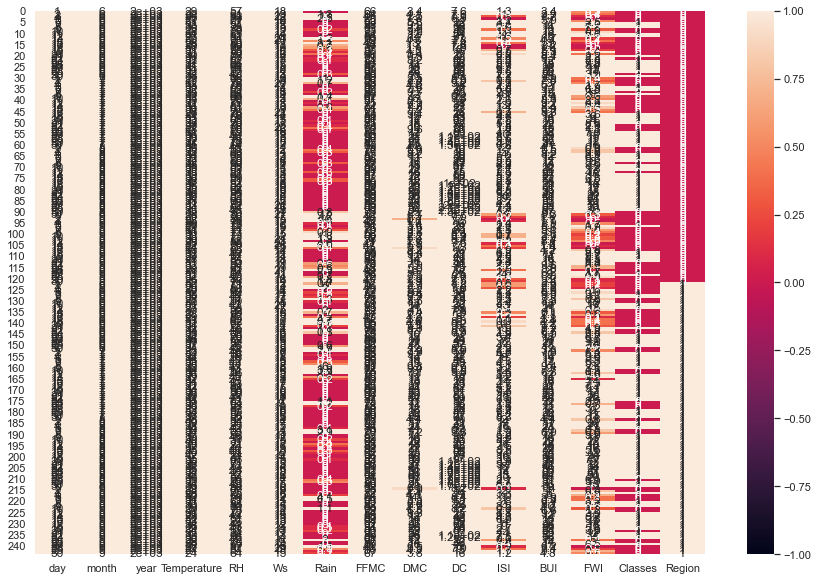

In [56]:
sns.set(rc={"figure.figsize":(15,10)})
sns.heatmap(data=data,annot=True,vmin=-1,vmax=1)

<AxesSubplot:>

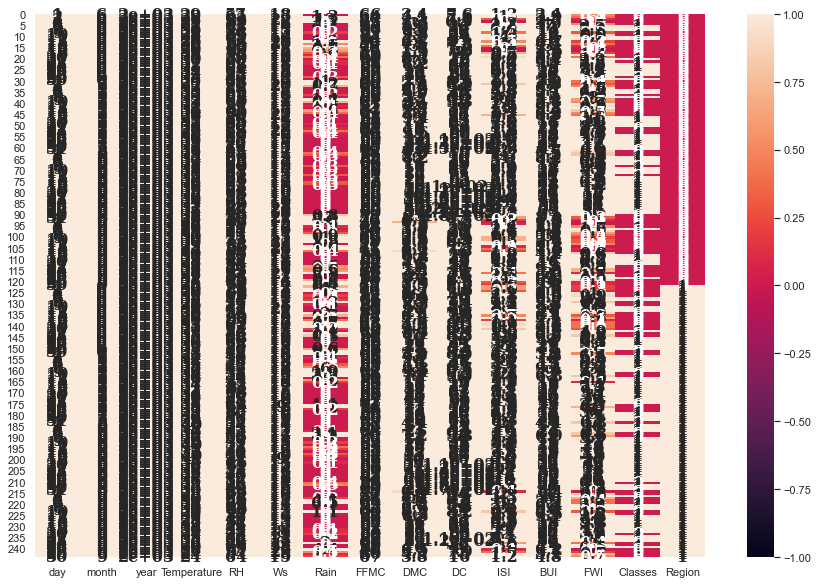

In [57]:
sns.set(rc={"figure.figsize":(15,10)})
sns.heatmap(data=data,annot=True,vmin=-1,vmax=1,annot_kws={"fontsize":16,"fontweight":"bold","fontfamily":"serif"})

<AxesSubplot:>

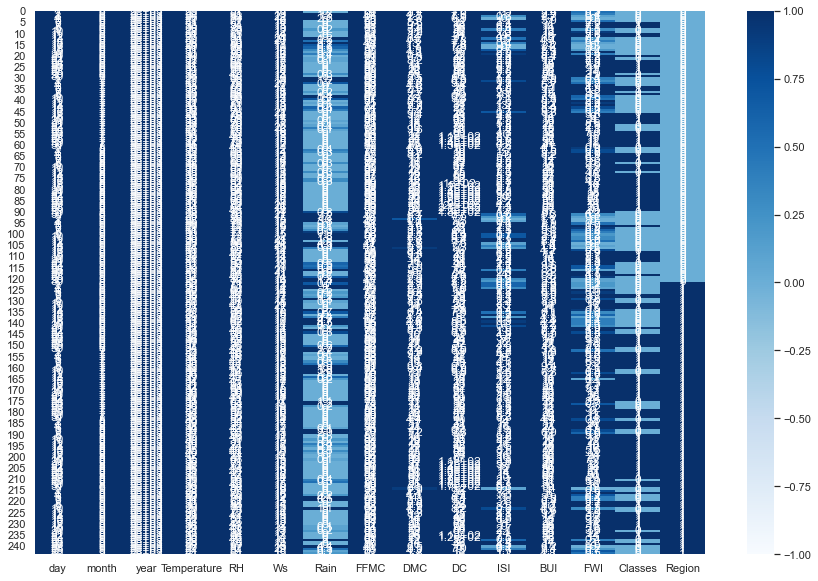

In [58]:
sns.set({"figure.figsize":(15,10)})
sns.heatmap(data=data,annot=True,cmap="Blues",center=0,vmin=-1,vmax=1)

<AxesSubplot:>

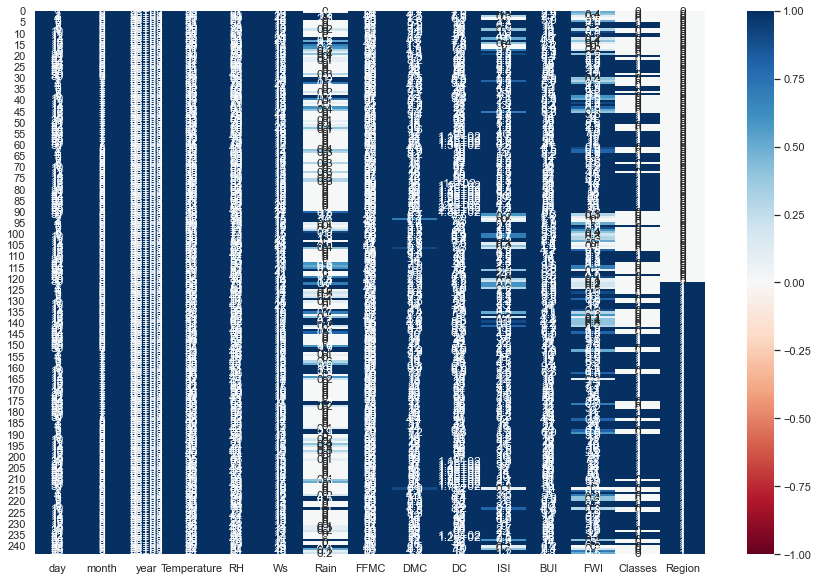

In [59]:
sns.set({"figure.figsize":(15,10)})
sns.heatmap(data=data,annot=True,cmap="RdBu",center=0,vmin=-1,vmax=1)

# <span style="color:red"> Note (For both positive and negative side)</span>

1.Correlation coefficients between 0.9 and 1.0, very highly correlated.

2.Correlation coefficients between 0.7 and 0.9, highly correlated.

3.Correlation coefficients between 0.5 and 0.7, moderately correlated.

4.Correlation coefficients between 0.3 and 0.5, low correlation.

5.Correlation coefficients less than 0.3, little correlation

<span style="color:red"> Observations</span>

1.Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI

2.Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI

Note: Features with very hihg and high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, we can drop one of the two features.

# <span style="color:green"> 4.0 Feature vs target </span>

# <span style="color:green"> 4.1 day </span>

<AxesSubplot:xlabel='day', ylabel='Temperature'>

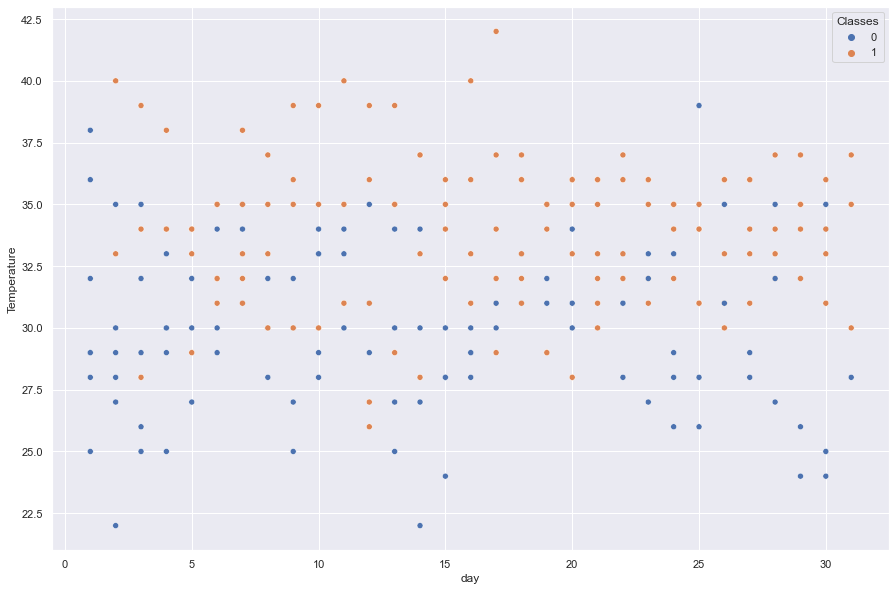

In [60]:
sns.scatterplot(data=data, x='day', y='Temperature', hue='Classes' )

<AxesSubplot:xlabel='month', ylabel='Temperature'>

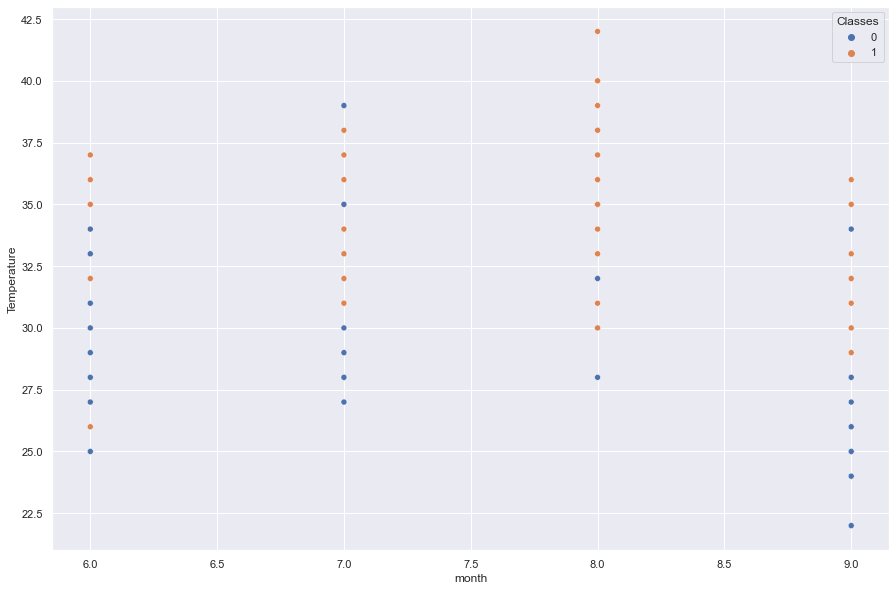

In [61]:
sns.scatterplot(data=data, x='month', y='Temperature', hue='Classes' )

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

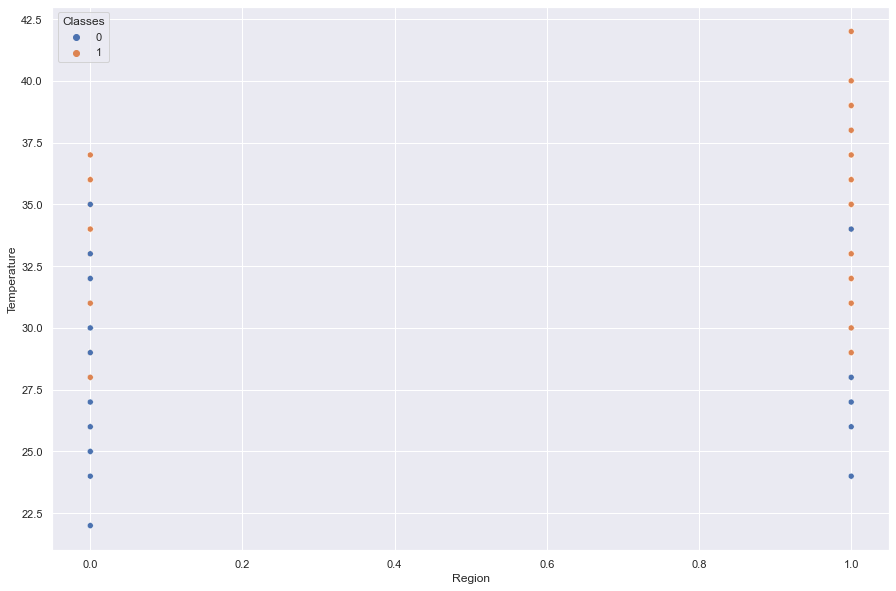

In [62]:
sns.scatterplot(data=data, x='Region', y='Temperature', hue='Classes' )

# <span style="color:red"> Observation </span>

1.Most cases of fire occur for temperature more than 30 degree celcius.

2.July and august have more cases of fire as compared to no fire.

3.june and september have more cases of no fire as compared to fire.

4.In Bejaia region, the no of cases of occurance of fire is less compared to no of cases of occurance of no fire.

5.In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire.

6.Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.

In [63]:
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

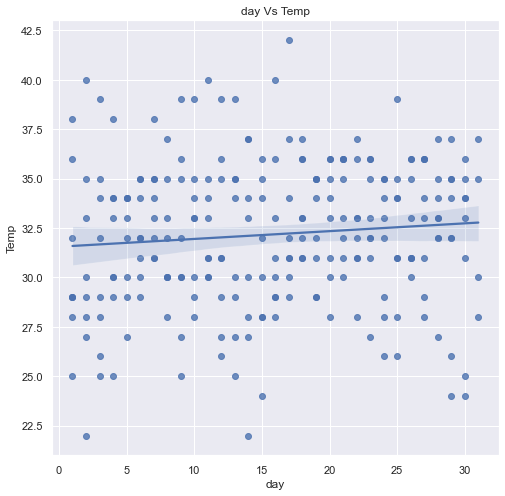

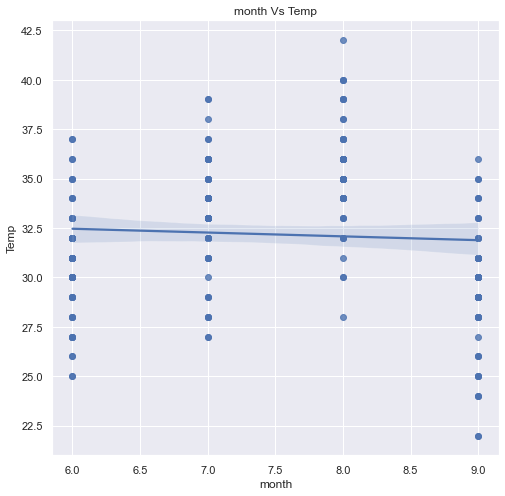

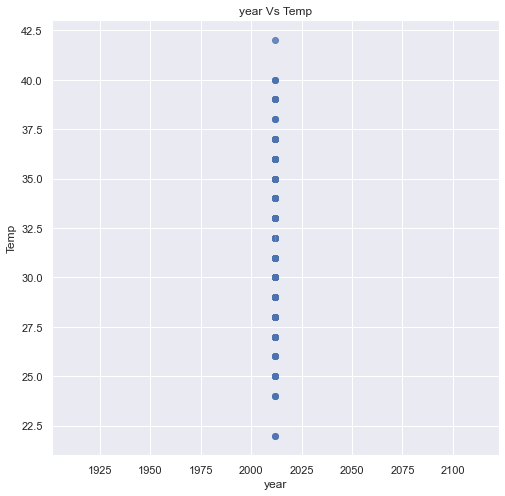

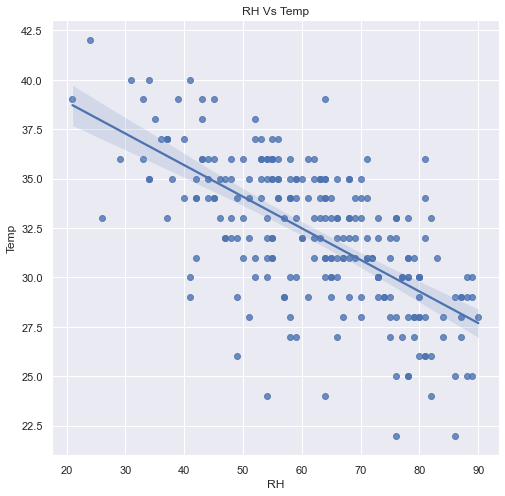

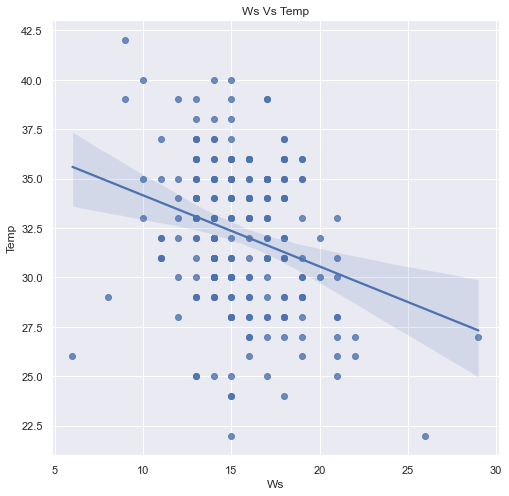

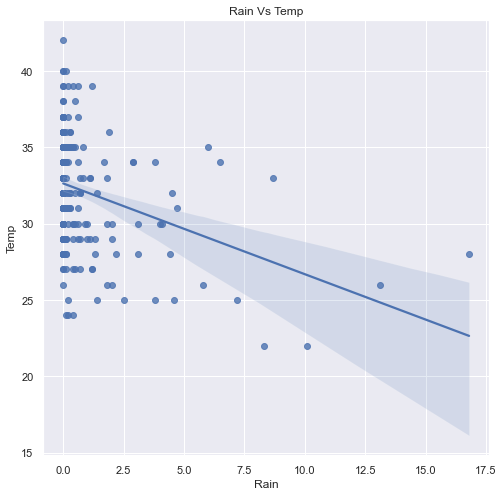

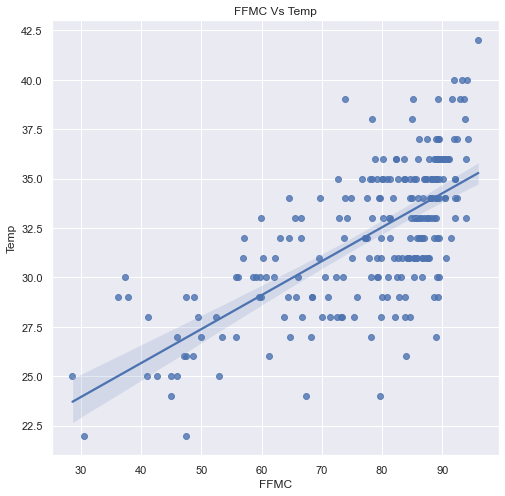

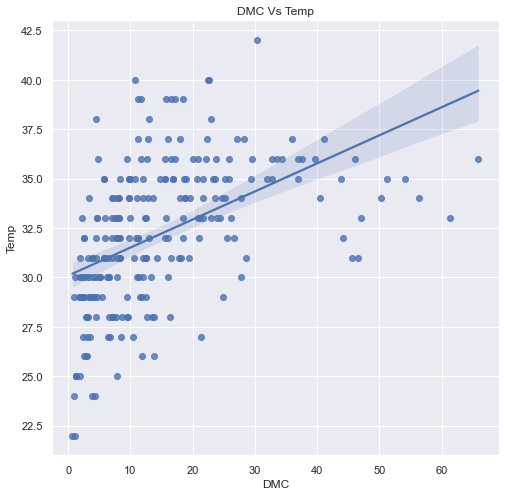

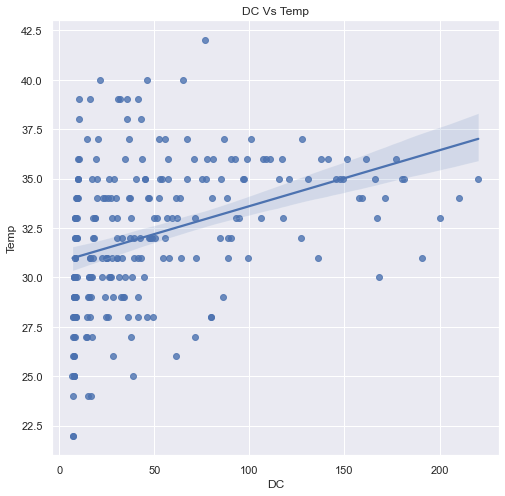

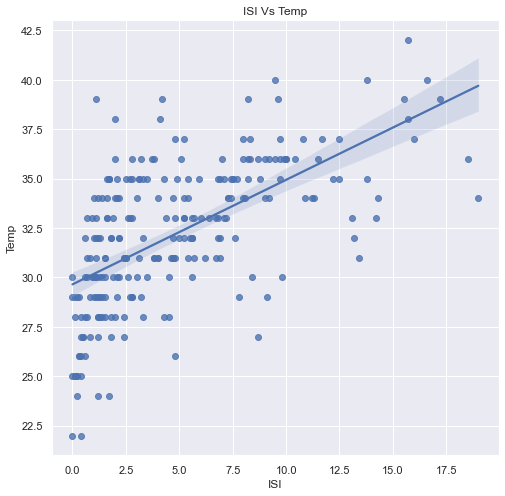

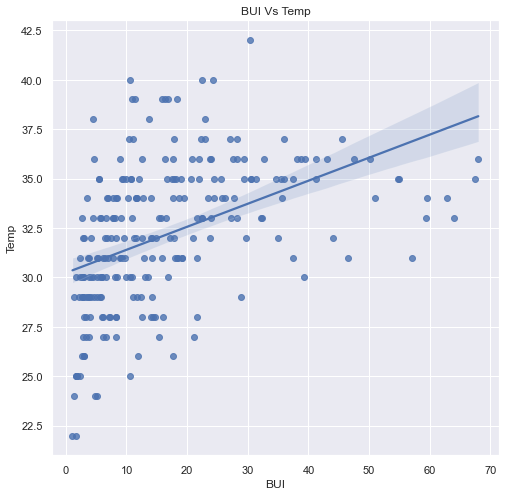

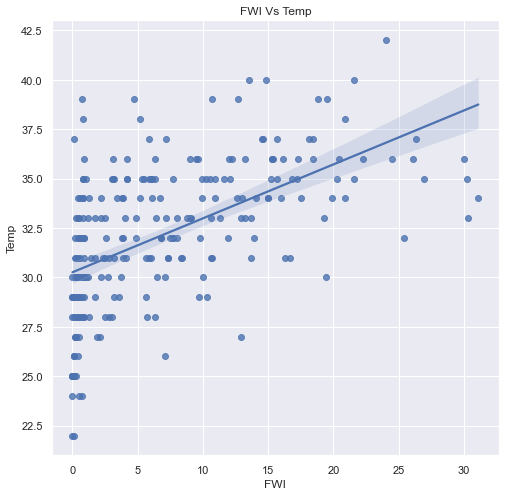

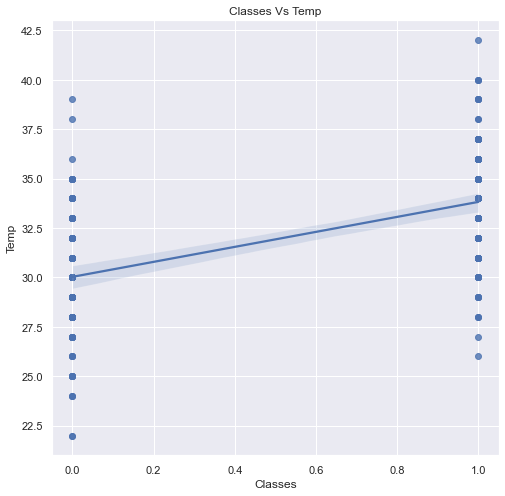

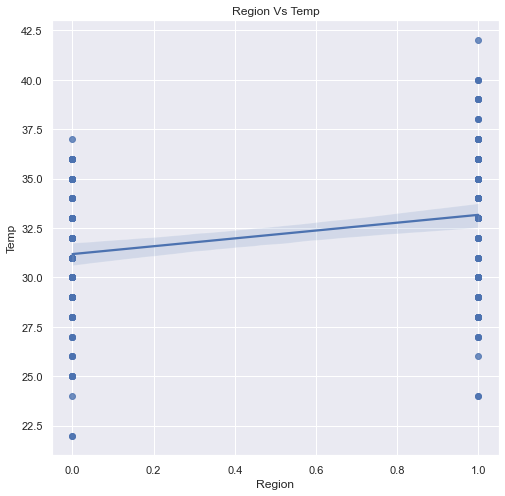

In [64]:
#### shaded region is basically with respect to ridge and lasso (lambda)
for feature in [feature for feature in data.columns if feature not in ['Temperature']]:
    sns.set(rc={'figure.figsize':(8,8)})
    sns.regplot(x=data[feature], y=data['Temperature'])
    plt.xlabel(feature)
    plt.ylabel("Temp")
    plt.title("{} Vs Temp".format(feature))
    plt.show();

# <span style="color:red"> Final Report </span>

1.Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI

2.Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI

3.Temperature between 30 to 37 degree celcius have most no of cases of occurance of fire.

4.Wind speed between 13 to 19 Km/hr range there is most no of occurance of fire.
5.Almost all cases of occurance of fire is for region having rain less than 1 mm, i.e dry regions are more prone to forrest fires.

6.For FFMC(Fine Fuel Moisture Code ) greater than 80, almost all cases of fire is reported.

7.DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected areas are more prone to forrest fires.

8.In Bejaia region, the no of cases of occurance of fire is less compared to no of cases of occurance of no fire.

9.In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire.

10.Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.

11.Most no of cases of fire occured are in the month of august and least no of cases of fire occured is in month of september.

12.July and august have more cases of fire as compared to no fire.

13.June and september have more cases of no fire as compared to fire.

14.Relative Humidity, RH feature doesnt have outliers whereas Temperature, FFMC, wind speed, Rain, DMC,DC, ISI, BUI and FWI have outilers.

15.There is no null vales in dataset.

Note: EDA and basic feature engineering is done its time to seperate independent and dependent features.

1.For demonstrating linear regression taking Temperature as Dependent feature.

2.dropping year feature as dataset contains only 2012 year

In [65]:
data.drop("year",axis=1,inplace=True)

In [66]:
data["Temp"]=data["Temperature"]

In [67]:
data.drop("Temperature",axis=1,inplace=True)

# <span style="color:green"> Starting Model Building Preperation </span>

# <span style="color:green"> 1.0 Getting Independent features in a dataset and Dependent feature in Series object </span>

In [68]:
data.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Temp
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0,29
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0,29
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0,26
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0,25
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0,27


In [80]:
### X independent features and y dependent feature

X=data.iloc[:, :-1]
y=data.iloc[ :,-1]

In [81]:
X.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [82]:
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temp, dtype: int64

# <span style="color:green"> 2.0 Splitting data into Training and Test data </span>

In [99]:
### splitting the data into training and test dataset

from sklearn.model_selection import train_test_split

In [100]:
### random state train test split will be same with all people using random_state=42

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [101]:
X_train.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
114,23,9,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0,0.0
65,5,8,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1,1,0.0
132,11,6,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,1,1.0
207,25,8,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1,1,1.0
162,11,7,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0,1.0


In [102]:
y_train.head()

114    32
65     34
132    31
207    34
162    34
Name: Temp, dtype: int64

In [103]:
X_test.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
24,25,6,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,1,0.0
6,7,6,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0.0
153,2,7,48,16,0.0,87.6,7.9,17.8,6.8,7.8,6.4,1,1.0
211,29,8,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,1,1.0
198,16,8,41,10,0.1,92.0,22.6,65.1,9.5,24.2,14.8,1,1.0


In [104]:
y_test.head()

24     31
6      33
153    33
211    35
198    40
Name: Temp, dtype: int64

In [107]:
### both will have same shape
X_train.shape,y_train.shape

((163, 13), (163,))

In [108]:
### both will have same shape
X_test.shape,y_test.shape

((81, 13), (81,))

# <span style="color:green"> 3.0 Feature Engineering </span>

<span style="color:green">3.1 Standardisation/ feature scaling the dataset </span>

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
### creating a StandardScalar object
scaler= StandardScaler()
scaler

StandardScaler()

In [112]:
### Using fit_transform to standardise Train data
X_train= scaler.fit_transform(X_train)
X_train

array([[ 0.84447703,  1.3826723 , -0.60257784, ..., -0.8196431 ,
        -1.04390785, -0.99388373],
       [-1.19310159,  0.48116996,  0.14460201, ..., -0.08219052,
         0.95793896, -0.99388373],
       [-0.51390872, -1.32183472, -1.41768313, ...,  1.36540157,
         0.95793896,  1.0061539 ],
       ...,
       [-1.64589683,  1.3826723 ,  0.89178186, ..., -0.90158227,
        -1.04390785, -0.99388373],
       [ 1.41047108, -0.42033238, -0.39880152, ...,  0.31384882,
         0.95793896,  1.0061539 ],
       [-0.51390872,  1.3826723 ,  0.9597073 , ..., -0.87426921,
        -1.04390785, -0.99388373]])

In [113]:
### here using only transform to avoid data leakage
### (training mean and training std will be used for standardisation of test when we use transform on test data)

X_test= scaler.transform(X_test)
X_test

array([[ 1.07087465, -1.32183472,  0.07667657, ...,  0.23190965,
         0.95793896, -0.99388373],
       [-0.96670396, -1.32183472, -0.60257784, ...,  0.0680313 ,
         0.95793896, -0.99388373],
       [-1.53269802, -0.42033238, -1.01013048, ..., -0.04122093,
         0.95793896,  1.0061539 ],
       ...,
       [ 1.29727227, -0.42033238, -1.01013048, ...,  1.17421016,
         0.95793896, -0.99388373],
       [-1.3063004 , -1.32183472,  0.07667657, ..., -0.77867351,
        -1.04390785,  1.0061539 ],
       [ 1.29727227, -1.32183472, -0.5346524 , ...,  0.7235447 ,
         0.95793896,  1.0061539 ]])

# <span style="color:green"> 4.0 Model Building </span>

# <span style="color:green"> 1.0 Linear Regression </span>

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
## creating linear regression model

linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [117]:
### Passing training data(X and y) to the model
linear_reg.fit(X_train,y_train)

LinearRegression()

In [125]:
### Printing co-efficients and intercept of best fit hyperplane

print("coeffient of independent variables {}".format(linear_reg.coef_))
print("intercept of best fit hyperplane {} ".format(linear_reg.intercept_))

coeffient of independent variables [-0.62994684 -0.33080692 -0.9681523  -0.55769053  0.23645285  1.90585623
  0.93380592  1.17296981  0.044581   -1.35995788  0.19772494 -0.25230922
  0.08345626]
intercept of best fit hyperplane 31.98159509202454 


# <span style="color:green"> 1.1 Using model to get predictions of test data </span>

In [126]:
linear_reg_predict =linear_reg.predict(X_test)
linear_reg_predict

array([32.86982262, 34.97907511, 34.71895423, 32.93220734, 36.64866482,
       32.00281859, 35.27819508, 28.49312857, 31.84450923, 29.27704091,
       29.06704133, 33.07364481, 32.4667427 , 32.7008168 , 34.32599535,
       31.80453584, 37.01042617, 25.23211237, 32.73196597, 33.38253854,
       31.55571716, 28.30699286, 34.23615097, 29.30603632, 36.93126913,
       24.98756128, 33.51228222, 33.57587507, 33.35705604, 35.40329932,
       33.767112  , 31.85221582, 32.40507656, 33.11736397, 32.44972087,
       31.46599605, 30.34784931, 34.2239929 , 32.37589956, 21.74277219,
       33.82900884, 34.85103093, 31.20651563, 24.69868309, 36.17424894,
       32.81796744, 31.22635993, 30.67357508, 35.1950892 , 34.29311524,
       36.98975313, 30.97884914, 30.95678802, 34.6655222 , 33.46814569,
       32.38222097, 36.65227179, 30.589826  , 30.97603618, 36.10290928,
       33.94615809, 28.43783118, 33.17776773, 31.78923636, 31.99593987,
       24.12810241, 33.39123143, 29.76320324, 36.80847578, 34.30

# <span style="color:green"> 1.2 Validating model using assumptions of Linear regression </span>

# <span style="color:green">1.2.1 Linear relationship </span>

1. Test truth data and Predicted data should follow linear relationship.

2.This is an indication of a good model.

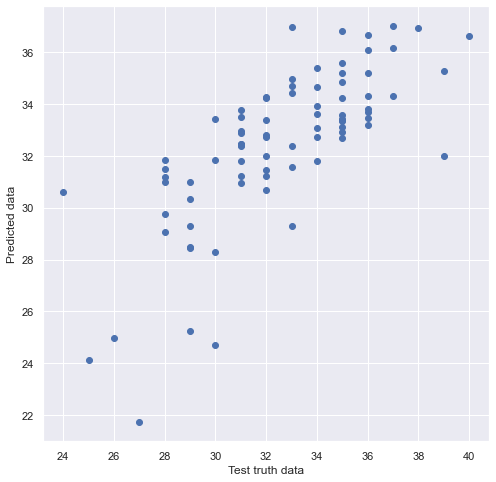

In [127]:
plt.scatter(x=y_test,y=linear_reg_predict)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")
plt.show();

# <span style="color:green"> 1.2.2 Residual distribution </span>

1.Residuals should follow normal distribution.

2.If residuals follow normal distribution, it indicates we have a good model.

In [129]:
Residual_linear_reg= (y_test-linear_reg_predict)
Residual_linear_reg.head()

24    -1.869823
6     -1.979075
153   -1.718954
211    2.067793
198    3.351335
Name: Temp, dtype: float64

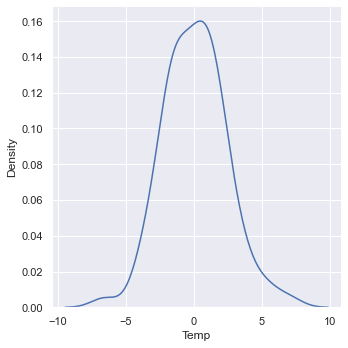

In [131]:
sns.displot(Residual_linear_reg,kind="kde")

# <span style="color:green"> 1.2.3 Uniform distribution </span>

1.Residuals vs Predictions should follow a uniform distribution.

2.If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

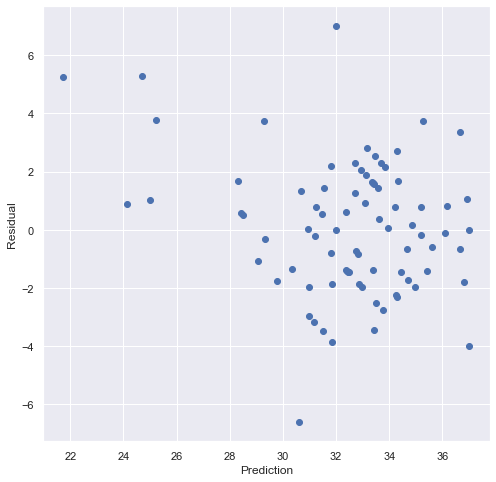

In [133]:
plt.scatter(y=Residual_linear_reg,x=linear_reg_predict)
plt.ylabel("Residual")
plt.xlabel("Prediction")
plt.show();

# <span style="color:green"> 1.3 Performance Matrix </span>

# <span style="color:green"> 1.3.1 Cost function values </span>

In [139]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# <span style="color:green"> MSE, MAE and RMSE </span>

In [143]:
print("Mean squared error is {}".format(round(mean_squared_error(y_test, linear_reg_predict),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(y_test, linear_reg_predict),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test, linear_reg_predict)),2)))

Mean squared error is 5.25
Mean absolute error is 1.81
Root Mean squared error is 2.29


# <span style="color:green"> 1.3.2 R Square and Adjusted R Square values </span>

In [146]:
from sklearn.metrics import r2_score

In [164]:
linear_reg_r2_score=r2_score(y_test, linear_reg_predict)
print("our linear regression model has {} % of accuracy ".format(round(linear_reg_r2_score*100,3)))
linear_reg_adj_r2_score=1-((1-linear_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R square accuracy is {} percent".format(round(linear_reg_adj_r2_score*100,2)))

our linear regression model has 51.089 % of accuracy 
Adjusted R square accuracy is 41.6 percent


# <span style="color:green"> 2.0 Ridge Regression </span>

In [165]:
from sklearn.linear_model import Ridge

In [166]:
## creating Ridge regression model

Ridge_reg=Ridge()
Ridge_reg

Ridge()

In [167]:
### Passing training data(X and y) to the model
Ridge_reg.fit(X_train,y_train)

Ridge()

In [172]:
### Printing co-efficients and intercept of best fit hyperplane
print("coeffient of indepentent feature is {}".format(Ridge_reg.coef_))
print("intercept of best fit hyperplane is {}".format(Ridge_reg.intercept_))


coeffient of indepentent feature is [-0.61752995 -0.3207458  -0.98218457 -0.55467826  0.21315492  1.84131702
  0.40094067  0.87094221  0.11396182 -0.48465778  0.08466793 -0.24063909
  0.09187935]
intercept of best fit hyperplane is 31.98159509202454


# <span style="color:green"> 2.1 Using model to get predictions of test data </span>

In [173]:
Ridge_reg_predict=Ridge_reg.predict(X_test)
Ridge_reg_predict

array([32.85982748, 34.9149207 , 34.6801255 , 32.92998132, 36.61056862,
       32.05917754, 35.25499575, 28.51988807, 31.83679288, 29.28276684,
       29.06439442, 33.15037313, 32.44677748, 32.7322483 , 34.35814975,
       31.78754571, 36.91567124, 25.31324295, 32.67492302, 33.35526777,
       31.49765658, 28.29644553, 34.22316335, 29.30830796, 36.93224783,
       25.06526261, 33.48461631, 33.57641555, 33.35387649, 35.32860357,
       33.76792408, 31.83362797, 32.37993338, 33.16010038, 32.42109455,
       31.5078178 , 30.28919718, 34.25440049, 32.3007279 , 21.86171205,
       33.83192673, 34.81983629, 31.24261825, 24.76831106, 36.10419592,
       32.77320818, 31.21807666, 30.69260083, 35.1742616 , 34.29037291,
       36.93483074, 30.9447582 , 30.97755205, 34.71719979, 33.43904851,
       32.52070875, 36.64973602, 30.62216011, 30.9696123 , 36.10416977,
       33.88939183, 28.47020463, 33.13493675, 31.7769902 , 32.00695307,
       24.17731957, 33.37004249, 29.76297127, 36.78001537, 34.44

# <span style="color:green"> 2.2 Validating model using assumptions of Ridge regression </span>

# <span style="color:green"> 2.2.1 Linear relationship </span>

1.Test truth data and Predicted data should follow linear relationship.

2.This is an indication of a good model.

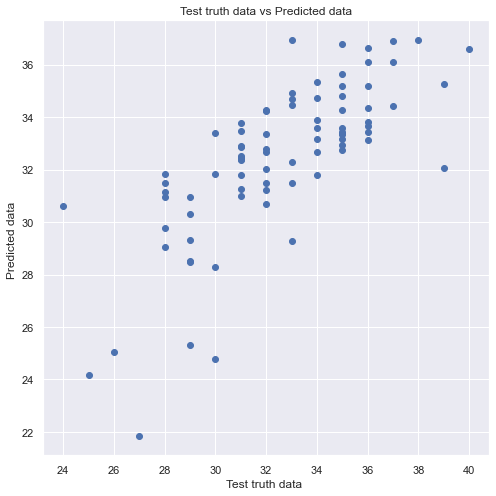

In [176]:
plt.scatter(x=y_test,y= Ridge_reg_predict)
plt.xlabel("Test truth data ")
plt.ylabel("Predicted data ")
plt.title("Test truth data vs Predicted data" )
plt.show();

# <span style="color:green"> 2.2.2 Residual distribution </span>

1.Residuals should follow normal distribution.

2.If residuals follow normal distribution, it indicates we have a good model.

In [178]:
Residuals_Ridge_reg=(y_test-Ridge_reg_predict)
Residuals_Ridge_reg.head()

24    -1.859827
6     -1.914921
153   -1.680125
211    2.070019
198    3.389431
Name: Temp, dtype: float64

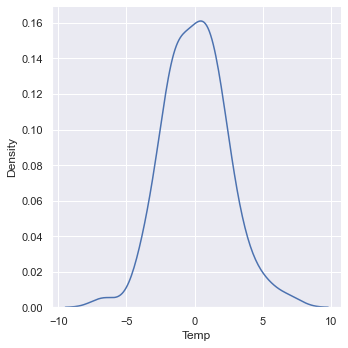

In [179]:
sns.displot(x=Residuals_Ridge_reg,kind="kde")

# <span style="color:green"> 2.2.3 Uniform distribution </span>

1.Residuals vs Predictions should follow a uniform distribution.

2.If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

Text(0, 0.5, 'Residuals')

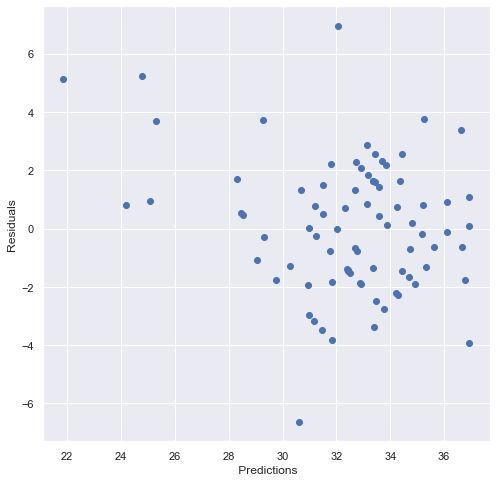

In [180]:
plt.scatter(x=Ridge_reg_predict,y=Residuals_Ridge_reg)
plt.xlabel(" Predictions")
plt.ylabel("Residuals")

# <span style="color:green"> 2.3 Performance Matrix </span>

# <span style="color:green">2.3.1 Cost function values </span>

# <span style="color:green">MSE, MAE and RMSE </span>

In [184]:
print("mean square error value is {}".format(round(mean_squared_error(y_test,Ridge_reg_predict),2)))
print("mean absolute error value is {}".format(round(mean_absolute_error(y_test,Ridge_reg_predict),2)))
print("root mean square error value is {}".format(round(np.sqrt(mean_squared_error(y_test,Ridge_reg_predict)),2)))

mean square error value is 5.19
mean absolute error value is 1.8
root mean square error value is 2.28


# <span style="color:green">2.3.2 R Square and Adjusted R Square values </span>

In [190]:
Ridge_reg_r2_score=r2_score(y_test,Ridge_reg_predict)
print("Ridge regression model have {} % of accuracy" .format(round(Ridge_reg_r2_score*100,3)))

Ridge_reg_adj_r2_score=1-((1-Ridge_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Ridge regression model have {} % of accuracy" .format(round(Ridge_reg_adj_r2_score*100,2)))

Ridge regression model have 51.709 % of accuracy
Ridge regression model have 42.34 % of accuracy


# <span style="color:green"> 3.0 Lasso Regression </span>

In [202]:
from sklearn.linear_model import Lasso

In [203]:
## creating Lasso regression model
Lasso_reg=Lasso()
Lasso_reg

Lasso()

In [204]:
### Passing training data(X and y) to the model
Lasso_reg.fit(X_train,y_train)

Lasso()

In [208]:
### Printing co-efficients and intercept of best fit hyperplane
print("coeffient of independent variable is {}".format(Lasso_reg.coef_))
print("intercept of best fit hyperplane is {}" .format(Lasso_reg.intercept_))

coeffient of independent variable is [-0.         -0.         -0.62324302 -0.         -0.          1.25581509
  0.          0.          0.          0.          0.          0.
  0.        ]
intercept of best fit hyperplane is 31.98159509202454


# <span style="color:green"> 3.1 Using model to get predictions of test data </span>

In [209]:
Lasso_reg_predict= Lasso_reg.predict(X_test)
Lasso_reg_predict

array([32.78381104, 33.3358205 , 33.53835729, 32.69192045, 34.21212444,
       31.67725854, 34.06518855, 28.84685412, 30.99078013, 30.10392027,
       31.06631475, 32.42020469, 32.80398907, 32.31726957, 33.37068778,
       32.46976122, 34.57875298, 27.38502889, 32.29240264, 33.12192792,
       31.62499111, 29.79900395, 33.65042591, 30.31559056, 34.62053146,
       28.73534108, 32.5527626 , 32.85187888, 32.99739235, 33.91411932,
       33.25917474, 31.27076256, 32.79238897, 32.82670067, 32.58151856,
       32.71432078, 31.4254765 , 33.30564213, 31.04995877, 28.31033379,
       32.79596672, 32.94981382, 32.61305239, 27.48796401, 34.24588058,
       32.5549849 , 31.88399562, 30.89031162, 34.19107957, 33.50571231,
       34.39861652, 31.81203876, 31.79074958, 32.97252542, 33.46393383,
       32.11393291, 34.88311373, 32.60669677, 31.06489233, 34.43070593,
       33.14932842, 31.16313854, 33.31119788, 32.23069043, 32.12966634,
       27.92377153, 33.05552681, 31.68837004, 34.34770454, 34.11

# <span style="color:green">3.2 Validating model using assumptions of Lasso regression </span>

# <span style="color:green">3.2.1 Linear relationship </span>

1.Test truth data and Predicted data should follow linear relationship.

2.This is an indication of a good model.

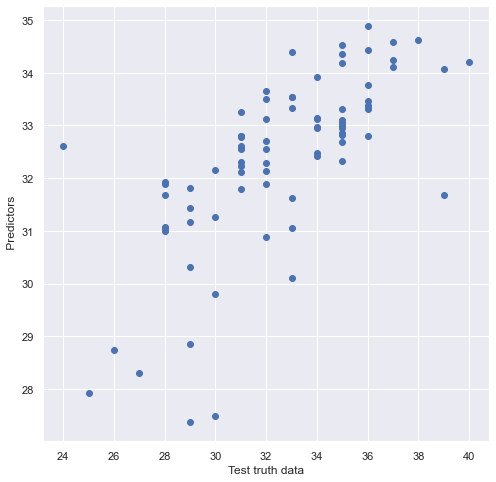

In [210]:
plt.scatter(x=y_test,y=Lasso_reg_predict)
plt.xlabel("Test truth data")
plt.ylabel(" Predictors")
plt.show();

# <span style="color:green"> 3.2.2 Residual distribution </span>

1.Residuals should follow normal distribution.

2.If residuals follow normal distribution, it indicates we have a good model.

In [212]:
Residuals_Lasso_reg= y_test-Lasso_reg_predict
Residuals_Lasso_reg.head()

24    -1.783811
6     -0.335821
153   -0.538357
211    2.308080
198    5.787876
Name: Temp, dtype: float64

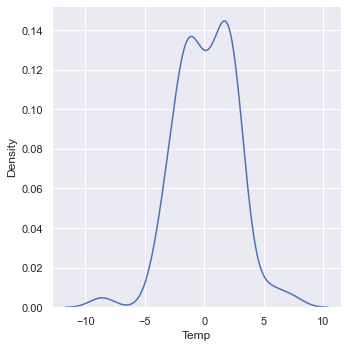

In [213]:
sns.displot(x=Residuals_Lasso_reg, kind="kde")

In [ ]:
3.2.3 Uniform distribution

1.Residuals vs Predictions should follow a uniform distribution.

2.If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

Text(0, 0.5, 'Residuals')

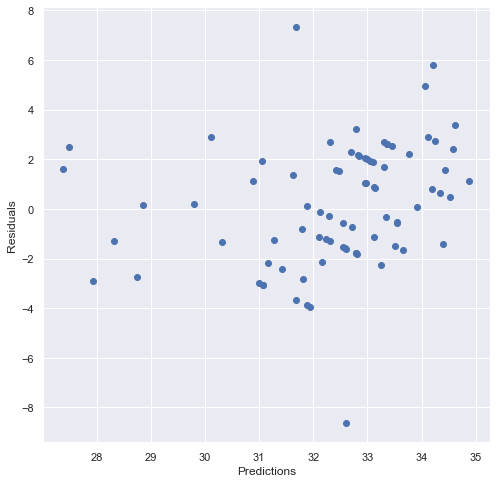

In [214]:
plt.scatter(x=Lasso_reg_predict,y=Residuals_Lasso_reg)
plt.xlabel("Predictions")
plt.ylabel("Residuals")

# <span style="color:green"> 3.3 Performance Matrix </span>

# <span style="color:green"> 3.3.1 Cost function values </span>

# <span style="color:green"> MSE, MAE and RMSE </span>

In [215]:
print("mean square error is {} ".format(round(mean_squared_error(y_test,Lasso_reg_predict),2)))
print("mean absolute error is {} ".format(round(mean_absolute_error(y_test,Lasso_reg_predict),2)))
print("root mean square error is {} ".format(round(np.sqrt(mean_squared_error(y_test,Lasso_reg_predict)),2)))

mean square error is 6.09 
mean absolute error is 2.0 
root mean square error is 2.47 


# <span style="color:green"> 3.3.2 R Square and Adjusted R Square values </span>

In [218]:
Lasso_reg_r2_score=r2_score(y_test,Lasso_reg_predict)
print("linear regression model has {} % of accuracy".format(round(Lasso_reg_r2_score*100,3)))

Lasso_reg_adjusted_r2_score=1-((1-Lasso_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("linear regression model has {} % of accuracy".format(round(Lasso_reg_adjusted_r2_score*100,2)))


linear regression model has 43.342 % of accuracy
linear regression model has 32.35 % of accuracy


# <span style ="color:green"> 4.0 Elastic-Net Regression </span>

In [219]:
from sklearn.linear_model import ElasticNet

In [220]:
## creating Elastic-Net regression model
ElasticNet_reg = ElasticNet()
ElasticNet_reg 

ElasticNet()

In [221]:
### Passing training data(X and y) to the model
ElasticNet_reg.fit(X_train,y_train)

ElasticNet()

In [222]:
### Printing co-efficients and intercept of best fit hyperplane
print("coeffient of independent variables is {}".format(ElasticNet_reg.coef_))
print(" intercept of best fit hyperplane is {}".format(ElasticNet_reg.intercept_))


coeffient of independent variables is [-0.         -0.         -0.68808933 -0.10544712 -0.00834786  0.85162206
  0.10376148  0.          0.23158765  0.02547021  0.15362153  0.07372069
  0.        ]
 intercept of best fit hyperplane is 31.98159509202454


# <span style="color:green"> 4.1 Using model to get predictions of test data </span>

In [224]:
ElasticNet_reg_predict = ElasticNet_reg.predict(X_test)
ElasticNet_reg_predict

array([32.70014869, 33.29910099, 33.41026626, 32.61092932, 34.7047485 ,
       31.58360838, 34.21527053, 29.02563256, 30.73347022, 30.11039166,
       30.41277398, 32.24275851, 32.49689882, 32.11572726, 33.82943086,
       32.26602144, 35.60101706, 27.89264401, 32.12951491, 32.95265792,
       31.02735367, 29.65251053, 33.71392821, 30.09882338, 35.36763797,
       28.87850096, 32.39310489, 32.86323328, 32.70140428, 34.17896096,
       33.34379291, 31.19918174, 32.72501691, 33.05000354, 32.11073799,
       32.39596102, 30.82655691, 33.29618332, 31.03905163, 27.97071052,
       32.81078878, 32.83085009, 32.18944481, 27.83881794, 34.71347157,
       32.40467835, 31.69547324, 30.73847724, 34.32027173, 33.61283179,
       35.5799204 , 31.38989764, 31.57088417, 33.58592157, 33.61999323,
       32.2560815 , 36.04767586, 32.00594323, 30.83622131, 34.89715148,
       33.0854042 , 30.78738109, 33.49083492, 31.9555529 , 31.71431021,
       27.98432489, 32.99835463, 31.35802614, 35.34742765, 34.15

# <span style="color:green"> 4.2 Validating model using assumptions of Elastic-Net regression </span>

# <span style="color:green"> 4.2.1 Linear relationship </span>

1.Test truth data and Predicted data should follow linear relationship.

2.This is an indication of a good model.

Text(0, 0.5, 'Predicted ')

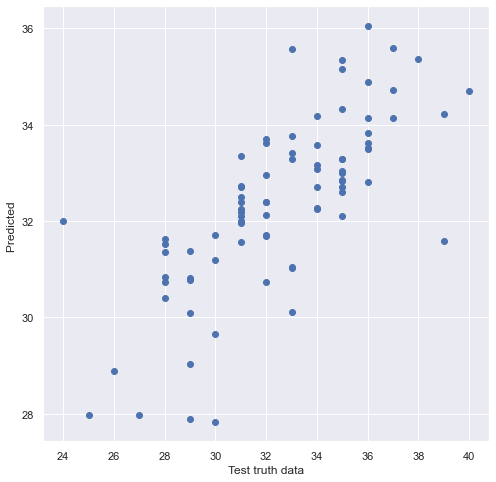

In [225]:
plt.scatter(x=y_test,y=ElasticNet_reg_predict)
plt.xlabel("Test truth data")
plt.ylabel("Predicted ")

# <span style= "color:green"> 4.2.2 Residual distribution </span>

1.Residuals should follow normal distribution.

2.If residuals follow normal distribution, it indicates we have a good model.

In [227]:
Residuals_ElasticNet_reg=(y_test-ElasticNet_reg_predict)
Residuals_ElasticNet_reg.head()

24    -1.700149
6     -0.299101
153   -0.410266
211    2.389071
198    5.295251
Name: Temp, dtype: float64

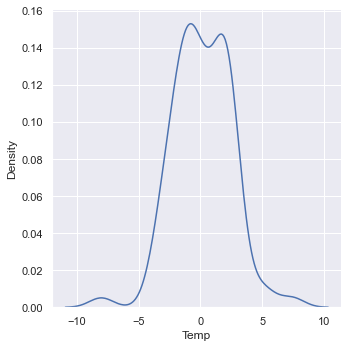

In [228]:
sns.displot(x=Residuals_ElasticNet_reg,kind="kde")

# <span style="color:green"> 4.2.3 Uniform distribution </span>

1.Residuals vs Predictions should follow a uniform distribution.

2.If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

Text(0, 0.5, 'Residuals')

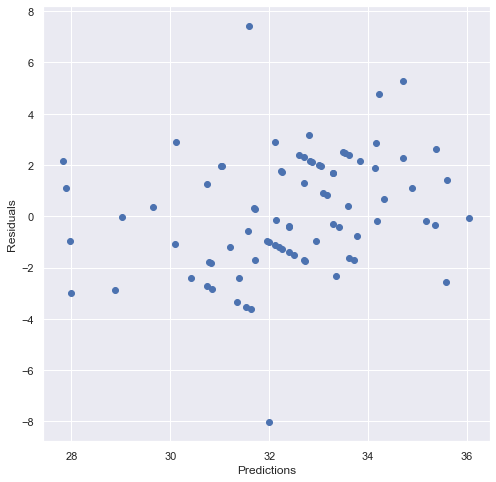

In [229]:
plt.scatter(x=ElasticNet_reg_predict,y=Residuals_ElasticNet_reg )
plt.xlabel("Predictions")
plt.ylabel("Residuals")

In [ ]:
4.3 Performance Matrix

In [ ]:
4.3.1 Cost function values

In [ ]:
MSE, MAE and RMSE

In [230]:
print("mean squared error value is {}".format(round(mean_squared_error(y_test,ElasticNet_reg_predict),2)))
print("mean absolute error value is {}".format(round(mean_absolute_error(y_test,ElasticNet_reg_predict),2)))
print("root mean square error value is {}".format(round(np.sqrt(mean_squared_error(y_test,ElasticNet_reg_predict)),2)))

mean squared error value is 5.39
mean absolute error value is 1.85
root mean square error value is 2.32


In [ ]:
4.3.2 R Square and Adjusted R Square values

In [234]:
ElasticNet_reg_r2_score=r2_score(y_test,ElasticNet_reg_predict)
print("linear regression model has {} % of accuracy".format(round(ElasticNet_reg_r2_score*100,2)))

ElasticNet_reg_adjusted_r2_score=1-((1-ElasticNet_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("linear regression model has {} % of accuracy".format(round(ElasticNet_reg_adjusted_r2_score*100,2)))

linear regression model has 49.81 % of accuracy
linear regression model has 40.07 % of accuracy


# <span style="color:green"> 5.0 Comparisions of all Models </span>

# <span style="color:green">5.1 MSE</span>

In [238]:
print("Linear regression mean square error is {}".format(round(mean_squared_error(y_test,linear_reg_predict),2)))
print("Ridge regression mean squared error is {}".format(round(mean_squared_error(y_test,Ridge_reg_predict),2)))
print("Lasso regression mean squared error is {}".format(round(mean_squared_error(y_test,Lasso_reg_predict),2)))
print("ElasticNet regression mean squared error is {}".format(round(mean_squared_error(y_test,ElasticNet_reg_predict),2)))

Linear regression mean square error is 5.25
Ridge regression mean squared error is 5.19
Lasso regression mean squared error is 6.09
ElasticNet regression mean squared error is 5.39


# <span style="color:green">5.2 MAE</span>

In [239]:
print("Linear regression mean absolute error is {}".format(round(mean_absolute_error(y_test,linear_reg_predict),2)))
print("Ridge regression mean absolute error is {}".format(round(mean_absolute_error(y_test,Ridge_reg_predict),2)))
print("Lasso regression mean absolute error is {}".format(round(mean_absolute_error(y_test,Lasso_reg_predict),2)))
print("ElasticNet regression mean absolute error is {}".format(round(mean_absolute_error(y_test,ElasticNet_reg_predict),2)))

Linear regression mean absolute error is 1.81
Ridge regression mean absolute error is 1.8
Lasso regression mean absolute error is 2.0
ElasticNet regression mean absolute error is 1.85


# <span style="color:green">5.3 RMSE</span>

In [240]:
print("Linear regression root mean square error is {}".format(round(np.sqrt(mean_squared_error(y_test,linear_reg_predict)),2)))
print("Ridge regression root mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test,Ridge_reg_predict)),2)))
print("Lasso regression root mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test,Lasso_reg_predict)),2)))
print("ElasticNet regression root mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test,ElasticNet_reg_predict)),2)))

Linear regression root mean square error is 2.29
Ridge regression root mean squared error is 2.28
Lasso regression root mean squared error is 2.47
ElasticNet regression root mean squared error is 2.32


# <span style="color:green">5.4 R Square values</span>

In [241]:
Linear_reg_r2_score=r2_score(y_test,linear_reg_predict)

print("Linear regression model has {} % of accuracy".format(round(Linear_reg_r2_score*100,3)))
print("Ridge regression model has {} % of accuracy".format(round(Ridge_reg_r2_score*100,3)))
print("Lasso regression model has {} % of accuracy".format(round(Lasso_reg_r2_score*100,3)))
print("ElasticNet regression model has {} % of accuracy".format(round(ElasticNet_reg_r2_score*100,3)))

Linear regression model has 51.089 % of accuracy
Ridge regression model has 51.709 % of accuracy
Lasso regression model has 43.342 % of accuracy
ElasticNet regression model has 49.812 % of accuracy


# <span style="color:green">5.5 Adjusted R Square values</span>

In [249]:
linear_reg_adjusted_r2_score= 1-((1-Linear_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print("Linear regression model has {} % of accuracy".format(round(linear_reg_adjusted_r2_score*100,3)))
print("Ridge regression model has {} % of accuracy".format(round(Ridge_reg_adj_r2_score*100,3)))
print("Lasso regression model has {} % of accuracy".format(round(Lasso_reg_adjusted_r2_score*100,3)))
print("ElasticNet regression model has {} % of accuracy".format(round(ElasticNet_reg_adjusted_r2_score*100,3)))

Linear regression model has 41.599 % of accuracy
Ridge regression model has 42.339 % of accuracy
Lasso regression model has 32.349 % of accuracy
ElasticNet regression model has 40.074 % of accuracy
